In [1]:
import constants
from prepare_dataset import *
from data_generator import TrainDataGenerator, ValDataGenerator


In [2]:
data_dir=constants.PATCH_OUTPUT_DIRECTORY
folds_list = split_train_test(data_dir, 2)
# train_fold(folds_list, 0, data_dir, 5)

Fold 0
Train:
Large_Tumor_Cells: 9201
Small_Tumor_Cells: 9861
Test:
Large_Tumor_Cells: 6350
Small_Tumor_Cells: 4136
_______________________________________
Fold 1
Train:
Large_Tumor_Cells: 6350
Small_Tumor_Cells: 4136
Test:
Large_Tumor_Cells: 9201
Small_Tumor_Cells: 9861
_______________________________________


In [3]:
fold = folds_list[0]

In [4]:
from collections import defaultdict

In [5]:
def get_dataset_for_fold(data_dir, folds_list, fold):
    """
    Given the root directory holding the dataset, and the train test split,
    gets paths and creates labels for all of the images in the train and test sets

    Args:
        data_dir (String): Path to top-level directory of dataset
        folds_list (dict of dicts): Output of split_train_test
        fold (int): Fold for which to extract data
    Returns:
        dict containing the paths, labels for train images in the form
            train_dict[SLIDE_FOLDER] = [(PATH, LABEL), ...]
        dict containing the paths, labels for test images in the form
            test_dict[SLIDE_FOLDER] = [(PATH, LABEL), ...]
        dict to convert between class names and integer labels
    """
    train_slides = folds_list[fold]['train']
    test_slides = folds_list[fold]['test']
    
    train_dict = defaultdict(lambda: defaultdict(list))
    test_dict = defaultdict(lambda: defaultdict(list))
    
    classes =  os.listdir(data_dir)
    class_to_label = {c:i for i,c in enumerate(classes)}

    for img_class in classes:
        class_path = os.path.join(data_dir, img_class)
        class_idx = class_to_label[img_class]
        slide_folders = os.listdir(class_path)

        for slide in slide_folders:
            if slide in train_slides:
                slide_path = os.path.join(class_path, slide)
                for img in os.listdir(os.path.join(class_path, slide)):
                    if img.endswith('.jpg'):
                        path = os.path.join(slide_path, img)
                        label = class_idx
                        train_dict[img_class][slide].append((path, label))
            elif slide in test_slides:
                slide_path = os.path.join(class_path, slide)
                for img in os.listdir(os.path.join(class_path, slide)):
                    if img.endswith('.jpg'):
                        path = os.path.join(slide_path, img)
                        label = class_idx
                        test_dict[img_class][slide].append((path, label))
            else:
                print(f"{slide} not assigned to train or test...")
                
        
        for class_name, class_dict in train_dict.items():
            for slide in list(class_dict.keys()):
                if len(class_dict[slide]) == 0:
                    del train_dict[class_name][slide]

        for class_name, class_dict in test_dict.items():
            for slide in list(class_dict.keys()):
                if len(class_dict[slide]) == 0:
                    del test_dict[class_name][slide]

    return train_dict, test_dict, class_to_label

In [6]:
train_dict, test_dict, class_to_label = get_dataset_for_fold(data_dir,folds_list, 0)

In [7]:
train_gen = TrainDataGenerator(train_dict, weight_by_size=Falsee)

In [8]:
test_gen = ValDataGenerator(test_dict)

In [8]:
for i in range(10):
    print(np.sum(train_gen.__getitem__(i)[1]))

14
13
18
15
16
18
19
16
16
14


In [32]:
im = train_gen.__getitem__(1)[0][0]

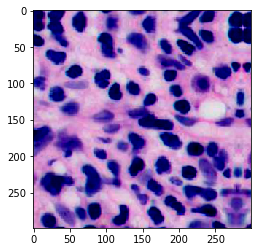

In [33]:
plt.imshow(np.clip(im, 0., 1.))
plt.show()

In [9]:
train_gen.labels_for_epoch[64:128]

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [10]:
epoch_size = 64*400
folders = random.choices(list(train_dict.keys()), k =epoch_size)

NameError: name 'random' is not defined

In [20]:
train_dict = train_dict = {f:[] for f in folds_list[0]['train']}
train_dict.keys()

dict_keys(['FLN03_Scan1', 'FLN05_Scan1', 'FLN06_Scan1', 'FLN07_Scan1', 'FLT01_Scan3', 'FLT04_Scan2', 'FLT09_Scan1', 'FLT12', 'FLT15_Scan1'])

In [21]:
test_gen.__getitem__(0)[1]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [23]:
test_gen.paths[test_gen.indexes[:64]]

array(['/Volumes/Backup/Projects/cancer_project/5:21:19/Datasets/FL/test3/data/large_tumor_cells/FLT12/FLT12_540.jpg',
       '/Volumes/Backup/Projects/cancer_project/5:21:19/Datasets/FL/test3/data/large_tumor_cells/FLT12/FLT12_1820.jpg',
       '/Volumes/Backup/Projects/cancer_project/5:21:19/Datasets/FL/test3/data/large_tumor_cells/FLT12/FLT12_2637.jpg',
       '/Volumes/Backup/Projects/cancer_project/5:21:19/Datasets/FL/test3/data/large_tumor_cells/FLT02_Scan3/FLT02_Scan3_1470.jpg',
       '/Volumes/Backup/Projects/cancer_project/5:21:19/Datasets/FL/test3/data/large_tumor_cells/FLT12/FLT12_1190.jpg',
       '/Volumes/Backup/Projects/cancer_project/5:21:19/Datasets/FL/test3/data/large_tumor_cells/FLT02_Scan3/FLT02_Scan3_1621.jpg',
       '/Volumes/Backup/Projects/cancer_project/5:21:19/Datasets/FL/test3/data/small_tumor_cells/FLT14_Scan1/FLT14_Scan1_255.jpg',
       '/Volumes/Backup/Projects/cancer_project/5:21:19/Datasets/FL/test3/data/large_tumor_cells/FLT02_Scan3/FLT02_Scan3_1917.

In [5]:
def get_dataset_for_fold(data_dir, folds_list, fold):
    """
    Given the root directory holding the dataset, and the train test split,
    gets paths and creates labels for all of the images in the train and test sets

    Args:
        data_dir (String): Path to top-level directory of dataset
        folds_list (dict of dicts): Output of split_train_test
        fold (int): Fold for which to extract data
    Returns:
        dict containing the paths, labels for train images in the form
            train_dict[SLIDE_FOLDER] = [(PATH, LABEL), ...]
        dict containing the paths, labels for test images in the form
            test_dict[SLIDE_FOLDER] = [(PATH, LABEL), ...]
        dict to convert between class names and integer labels
    """
    train_dict = {f:[] for f in folds_list[fold]['train']}
    test_dict = {f:[] for f in folds_list[fold]['test']}
    
    classes =  os.listdir(data_dir)
    class_to_label = {c:i for i,c in enumerate(classes)}

    for img_class in classes:
        class_path = os.path.join(data_dir, img_class)
        class_idx = class_to_label[img_class]
        slide_folders = os.listdir(class_path)

        for slide in slide_folders:
            if slide in train_dict.keys():
                slide_path = os.path.join(class_path, slide)
                for img in os.listdir(os.path.join(class_path, slide)):
                    if img.endswith('.jpg'):
                        path = os.path.join(slide_path, img)
                        label = class_idx
                        train_dict[slide].append((path, label))
            elif slide in test_dict.keys():
                slide_path = os.path.join(class_path, slide)
                for img in os.listdir(os.path.join(class_path, slide)):
                    if img.endswith('.jpg'):
                        path = os.path.join(slide_path, img)
                        label = class_idx
                        test_dict[slide].append((path, label))
            else:
                print(f"{slide} not assigned to train or test...")
                
        
        for key in list(train_dict.keys()):
            if len(train_dict[key]) == 0:
                del train_dict[key]

        for key in list(test_dict.keys()):
            if len(test_dict[key]) == 0:
                del test_dict[key]

    return train_dict, test_dict, class_to_label

In [23]:
train, test, c2l = get_dataset_for_fold(data_dir, folds_list, 0)

In [32]:
def create_epoch(set_dict, epoch_length = 1000):
    folders = list(set_dict.keys())
    epoch_folders = random.choices(folders, k = epoch_length)
    
    paths, labels = [], []
    for dir in epoch_folders:
        folder_data = set_dict[dir]
        path, label = random.choice(folder_data)
        paths.append(path)
        labels.append(label)
    
    return np.array(paths), np.array(labels, dtype=np.float32)

In [41]:
p, l = create_epoch(train)

In [42]:
np.sum(l)

427.0

In [26]:
def get_img(path):
        # im = tf.keras.preprocessing.image.load_img(path)
        # return tf.keras.preprocessing.image.img_to_array(im)
        # tf.keras.applications.resnet50.preprocess_input()
        im = Image.open(path)
        return (np.array(im) / 127.5) - np.mean((np.array(im) / 127.5))

In [28]:
from PIL import Image

get_img(data['train'][idx])

array([[[-0.91627979, -1.04176999, -0.35157391],
        [-0.91627979, -1.04176999, -0.35157391],
        [-0.90843665, -1.01824058, -0.3280445 ],
        ...,
        [-0.19471116, -0.17902489,  0.26803393],
        [-0.02216214,  0.00136727,  0.41705354],
        [ 0.08764178,  0.1347006 ,  0.52685746]],

       [[-0.87706411, -1.0025543 , -0.31235822],
        [-0.87706411, -1.0025543 , -0.31235822],
        [-0.87706411, -0.98686803, -0.29667195],
        ...,
        [-0.27314254, -0.25745626,  0.20528884],
        [-0.07706411, -0.05353469,  0.37783786],
        [ 0.04842609,  0.0719555 ,  0.48764178]],

       [[-0.83000528, -0.95549548, -0.25745626],
        [-0.83784842, -0.96333862, -0.2652994 ],
        [-0.85353469, -0.97118175, -0.25745626],
        ...,
        [-0.40647587, -0.3907896 ,  0.08764178],
        [-0.21824058, -0.2025543 ,  0.2601908 ],
        [-0.09275038, -0.07706411,  0.36999472]],

       ...,

       [[ 0.48764178,  0.30724962,  0.52685746],
        [ 0

In [29]:
im = Image.open(data['train'][idx])

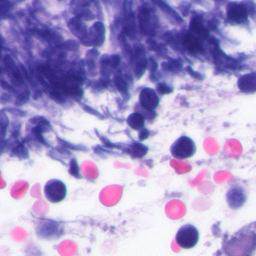

In [30]:
im

In [5]:
train_gen = DataGenerator(data['train'], labels['train'])

In [53]:
train_gen.__getitem__(0)

(array([[[[0.9254902 , 0.9137255 , 0.94117647],
          [0.92156863, 0.90980393, 0.93725491],
          [0.92156863, 0.90980393, 0.93725491],
          ...,
          [0.85490197, 0.71372551, 0.85490197],
          [0.85490197, 0.71372551, 0.85490197],
          [0.8509804 , 0.70980394, 0.8509804 ]],
 
         [[0.93333334, 0.92156863, 0.94901961],
          [0.92941177, 0.91764706, 0.94509804],
          [0.9254902 , 0.9137255 , 0.94117647],
          ...,
          [0.87058824, 0.73333335, 0.86274511],
          [0.87058824, 0.73333335, 0.86274511],
          [0.87058824, 0.73333335, 0.86274511]],
 
         [[0.9254902 , 0.90196079, 0.94117647],
          [0.91764706, 0.90588236, 0.94117647],
          [0.91764706, 0.90588236, 0.94117647],
          ...,
          [0.89019608, 0.74509805, 0.87843138],
          [0.89411765, 0.74901962, 0.88235295],
          [0.89411765, 0.74901962, 0.88235295]],
 
         ...,
 
         [[0.76862746, 0.60000002, 0.76862746],
          [0.75294

In [12]:
path = train_gen.list_IDs[5]

In [54]:
train_gen.list_IDs[:32]

array(['/Volumes/Elements/5:21:19/Datasets/FL/test3/data/small_tumor_cells/FLN05_Scan1/FLN05_Scan1_3374.jpg',
       '/Volumes/Elements/5:21:19/Datasets/FL/test3/data/small_tumor_cells/FLN03_Scan1/FLN03_Scan1_631.jpg',
       '/Volumes/Elements/5:21:19/Datasets/FL/test3/data/large_tumor_cells/FLT09_Scan1/FLT09_Scan1_1463.jpg',
       '/Volumes/Elements/5:21:19/Datasets/FL/test3/data/small_tumor_cells/FLN05_Scan1/FLN05_Scan1_2485.jpg',
       '/Volumes/Elements/5:21:19/Datasets/FL/test3/data/small_tumor_cells/FLN03_Scan1/FLN03_Scan1_1685.jpg',
       '/Volumes/Elements/5:21:19/Datasets/FL/test3/data/small_tumor_cells/FLN05_Scan1/FLN05_Scan1_5599.jpg',
       '/Volumes/Elements/5:21:19/Datasets/FL/test3/data/small_tumor_cells/FLN05_Scan1/FLN05_Scan1_4464.jpg',
       '/Volumes/Elements/5:21:19/Datasets/FL/test3/data/large_tumor_cells/FLT03_Scan1/FLT03_Scan1_722.jpg',
       '/Volumes/Elements/5:21:19/Datasets/FL/test3/data/small_tumor_cells/FLN05_Scan1/FLN05_Scan1_70.jpg',
       '/Volum

In [47]:
 batch = train_gen.indexes[:64]

In [51]:
data_batch = [train_gen.list_IDs[k] for k in batch]
labels_batch = [train_gen.labels[k] for k in batch]

In [52]:
labels_batch

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0]

In [13]:
from PIL import Image

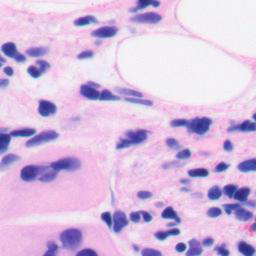

In [14]:
im = Image.open(path)
im

In [23]:
np.mean((np.array(im) / 255.).astype(np.float32))

0.8176122

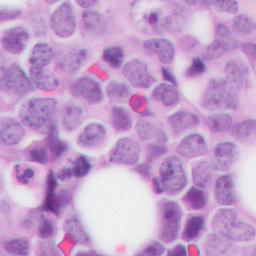

In [40]:
Image.fromarray((train_gen.__getitem__(0)[0][0] * 255).astype(np.uint8))

In [10]:
test_gen = DataGenerator(data['test'], labels['test'])

In [26]:
class_to_label

{'large_tumor_cells': 0, 'small_tumor_cells': 1}

In [10]:
 batch =test_gen.__getitem__(1)[1]

NameError: name 'test_gen' is not defined

In [16]:
list(test_gen.labels[test_gen.indexes])

[0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0

In [18]:
import tensorflow as tf
model = tf.keras.models.load_model("model_fold_0")

Instructions for updating:
Use tf.cast instead.


In [21]:
model.predict(test_gen.__getitem__(1)[0])

array([[0.00885263],
       [0.00561583],
       [0.0114601 ],
       [0.01333216],
       [0.00798571],
       [0.0087736 ],
       [0.00964171],
       [0.00664821],
       [0.01544005],
       [0.00484586],
       [0.01214024],
       [0.01148418],
       [0.0059509 ],
       [0.00771117],
       [0.00414598],
       [0.00721994],
       [0.00562453],
       [0.00634694],
       [0.0072425 ],
       [0.00634328],
       [0.00773385],
       [0.00601453],
       [0.00544402],
       [0.0120382 ],
       [0.00815028],
       [0.00767025],
       [0.00794753],
       [0.0093219 ],
       [0.0047169 ],
       [0.01083148],
       [0.01274875],
       [0.0044058 ],
       [0.01062378],
       [0.00659287],
       [0.01064762],
       [0.00605899],
       [0.00568599],
       [0.0038963 ],
       [0.01037562],
       [0.0136224 ],
       [0.01628599],
       [0.00795296],
       [0.00837699],
       [0.01069579],
       [0.00979853],
       [0.01696908],
       [0.0061501 ],
       [0.010

In [23]:
test_gen.list_IDs[test_gen.indexes][64:128]

array(['/Volumes/Elements/5:21:19/Datasets/FL/test3/data/large_tumor_cells/FLT03_Scan1/FLT03_Scan1_6150.jpg',
       '/Volumes/Elements/5:21:19/Datasets/FL/test3/data/small_tumor_cells/FLN03_Scan1/FLN03_Scan1_514.jpg',
       '/Volumes/Elements/5:21:19/Datasets/FL/test3/data/large_tumor_cells/FLT03_Scan1/FLT03_Scan1_3172.jpg',
       '/Volumes/Elements/5:21:19/Datasets/FL/test3/data/large_tumor_cells/FLT09_Scan1/FLT09_Scan1_2394.jpg',
       '/Volumes/Elements/5:21:19/Datasets/FL/test3/data/large_tumor_cells/FLT03_Scan1/FLT03_Scan1_4670.jpg',
       '/Volumes/Elements/5:21:19/Datasets/FL/test3/data/small_tumor_cells/FLN05_Scan1/FLN05_Scan1_913.jpg',
       '/Volumes/Elements/5:21:19/Datasets/FL/test3/data/large_tumor_cells/FLT09_Scan1/FLT09_Scan1_2151.jpg',
       '/Volumes/Elements/5:21:19/Datasets/FL/test3/data/small_tumor_cells/FLN05_Scan1/FLN05_Scan1_2001.jpg',
       '/Volumes/Elements/5:21:19/Datasets/FL/test3/data/large_tumor_cells/FLT03_Scan1/FLT03_Scan1_6349.jpg',
       '/Vol

In [9]:
import tensorflow as tf

In [10]:
tf.keras.utils.to_categorical(batch, num_classes=2)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [11]:
batch

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [34]:
from collections import Counter

In [35]:
c = Counter()

In [49]:
c[2] += 1

In [50]:
c[1] += 1

In [51]:
c

Counter({1: 2, 2: 2})

In [61]:
c.most_common(1)

[(1, 2)]

In [66]:
np.array(list(c.values()))

array([2, 2])

In [22]:
import numpy as np
from math import ceil

In [114]:
epochs = 6
steps_per_epoch = 200
cycle_length = 2
min_lr = 1e-5
max_lr = 1e-2

mult_factor = 2

n_cycles = ceil(epochs / cycle_length)


lrs = np.tile(np.linspace(0, 1,num=steps_per_epoch * cycle_length), n_cycles)
lrs.shape

(1200,)

In [74]:
max_lrs = np.repeat([mult_factor ** i for i in range(n_cycles)], cycle_length * steps_per_epoch)

    

In [75]:
max_lrs.shape

(1600,)

In [29]:
np.repeat(np.linspace(0, 1,num=steps_per_epoch * cycle_length), repeats = np.ceil(epochs / cycle_length)).shape

(1600,)

In [76]:
lrs = min_lr + 0.5 * (max_lrs - min_lr) * (1 + np.cos(lrs * np.pi))

In [77]:
lrs.shape

(1600,)

In [78]:
import matplotlib.pyplot as plt

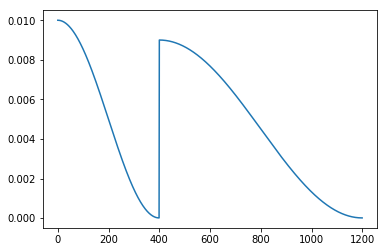

In [118]:
plt.plot(lrs)
plt.show()

In [85]:
num_epochs = 0
num_mults = 0
cycle_lens = []

while num_epochs < epochs:
    num_epochs += cycle_length
    num_mults += 1 
    cycle_lens.append(cycle_length)
    cycle_length = ceil(cycle_length * mult_factor)

In [86]:
cycle_lens

[2, 4, 8]

In [87]:
num_epochs

14

In [115]:
decay =0.9
num_epochs = 0
cycle_lens = []

while num_epochs < epochs:
    num_epochs += cycle_length
    cycle_lens.append(cycle_length)
    cycle_length = ceil(cycle_length * mult_factor)

num_steps = num_epochs * steps_per_epoch
fracs = np.zeros(num_steps)
max_lrs = np.zeros(num_steps)
idx = 0
for i, l in enumerate(cycle_lens):
    steps = steps_per_epoch * l
    fracs[idx:steps+idx] = np.linspace(0,1,num=steps)
    max_lrs[idx:steps+idx] = np.repeat(max_lr * (decay ** i), steps)
    idx += steps

lrs = min_lr + 0.5 * (max_lrs - min_lr) * (1 + np.cos(fracs * np.pi))

In [116]:
fracs.shape

(1200,)

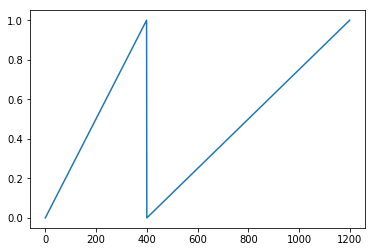

In [117]:
plt.plot(fracs)
plt.show()